#### DSC550
##### Week5 assignment, Author: Xin Tang, 4/6/24

In [1]:
# Get the stemmed data using the same process as in week3.

# load packages first
import numpy as np 
import pandas as pd
from bs4 import BeautifulSoup
import re

import string
import nltk

# load the data frame
df = pd.read_csv('labeledTrainData.tsv', delimiter='\t')
test_df = pd.read_csv('testData.tsv', delimiter='\t')
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [2]:
# Clean up. it is known that there is no empty row and no duplicate
# drop ID column
df.drop(columns = ['id'])

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

stopwords = nltk.corpus.stopwords.words("english")
ps = PorterStemmer()
def clean(review):
    # Remove data from webpages
    clean_html = BeautifulSoup(review).get_text()
    # Remove symbols
    clean_non_letters = re.sub("[^a-zA-Z]", " ", clean_html)
    # lower case words
    cleaned_lowercase = clean_non_letters.lower()
    words = cleaned_lowercase.split()
    # Remove stopwords, stemlize and consider just stem word
    cleaned_words = [ps.stem(w) for w in words if w not in stopwords]
    return " ".join(cleaned_words)
    
df["cleaned_review"] = df["review"].apply(clean)

C:\Users\Daisy\AppData\Local\Temp\ipykernel_9260\1396983158.py:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_html = BeautifulSoup(review).get_text()


In [3]:
df.head(3)

,id,sentiment,review,cleaned_review
0,5814_8,1,With all this stuff going down at the moment w...,stuff go moment mj start listen music watch od...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",classic war world timothi hine entertain film ...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,film start manag nichola bell give welcom inve...


In [4]:
# tokenize the string
#from tensorflow.keras.preprocessing.text import Tokenizer
def tokenize(text):
    word = word_tokenize(text)
    return word

df['token'] =df['cleaned_review'].apply(tokenize)

In [9]:
#! pip install tensorflow

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------------------------------------- 46.2/46.2 kB 765.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB 3.3 MB/s eta 0:01:55
   ---------------------------------------- 0.2/377.0 MB 2.9 MB/s eta 0:02:11
   ---------------------------------------- 0.5/377.0 MB 4.0 MB/s eta 0:01:34
   ---------------------------------------- 0.5/377.0 MB 4.0 MB/s eta 0:01:34
   ---------------------------------------- 0.5/377.0 MB 4.0 MB/s eta 0:01:34
   ---------------------------------------- 1.0/377.0 MB 4.1 MB/s eta 0:01:32
   ---------------------------------------- 1.1/377.0 MB 3.7 MB/s eta 0:01:42
   ---------------------------------------- 1.3/377.0 MB 3.8 MB/s eta 0:01:38
   ---------------------------------------- 1.6/377.0 MB 4.0 MB/s eta 0:01:35
   ---------------------------------------- 1.8/377.0 MB 4.2 MB/s eta 0:01:


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Daisy\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [5]:
df['token'].head()

0    [stuff, go, moment, mj, start, listen, music, ...
1    [classic, war, world, timothi, hine, entertain...
2    [film, start, manag, nichola, bell, give, welc...
3    [must, assum, prais, film, greatest, film, ope...
4    [superbl, trashi, wondrous, unpretenti, exploi...
Name: token, dtype: object

In [6]:
# Split this into a training and test set.

from sklearn.model_selection import train_test_split
input = df['cleaned_review']
labels = np.array(df['sentiment'])
x_train, x_test, y_train, y_test = train_test_split(input, labels, test_size=0.2)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(20000,) (20000,) (5000,) (5000,)


In [8]:
# Fit and apply the tf-idf vectorization to the training set.
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)

In [9]:
# Apply but DO NOT FIT the tf-idf vectorization to the test set
# Why do not fit: because in reality, we know nothing about test set, so not allowed to assume (or fit) anything on test set
xv_test = vectorization.transform(x_test)

In [10]:
# Train a logistic regression using the training data.
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier

model = LogisticRegression()

# fit the model
model.fit(xv_train,y_train)

#Predicting the test set results based on the model
y_pred = model.predict(xv_test)

In [12]:
# Find the model accuracy on test set.

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of LR model is ', accuracy)

Accuracy of LR model is  0.8858


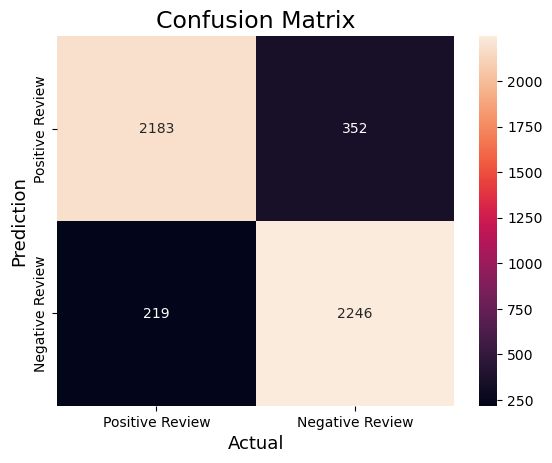

In [16]:
# Create a confusion matrix for the test set predictions.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

#visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Positive Review','Negative Review'],
            yticklabels=['Positive Review','Negative Review'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [17]:
# Get the precision, recall, and F1-score for the test set predictions.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2535
           1       0.86      0.91      0.89      2465

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



AUC value is: 0.9549164436229503


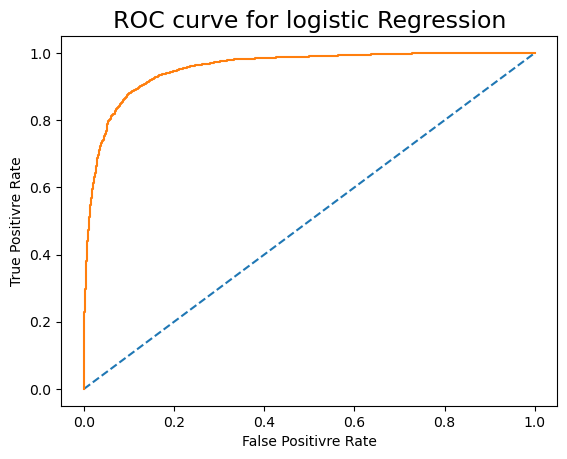

In [35]:
# Create a ROC curve for the test set.
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob = model.predict_proba(xv_test)[:,1]
#y_pred_prob[0]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

print('AUC value is:',roc_auc_score(y_test, y_pred_prob))

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel('False Positivre Rate')
plt.ylabel('True Positivre Rate')
plt.title('ROC curve for logistic Regression',fontsize=17)
plt.show()

In [34]:
# Pick another classification model you learned about this week and repeat above steps
# Try to use support vector Machine model

from sklearn.svm import SVC

svm_model = SVC(kernel='linear')

#Fitting training set to the model
svm_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
svm_y_pred = svm_model.predict(xv_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,svm_y_pred)
print('Accuracy of SVM model is ', score)

Accuracy of SVM model is  0.8858


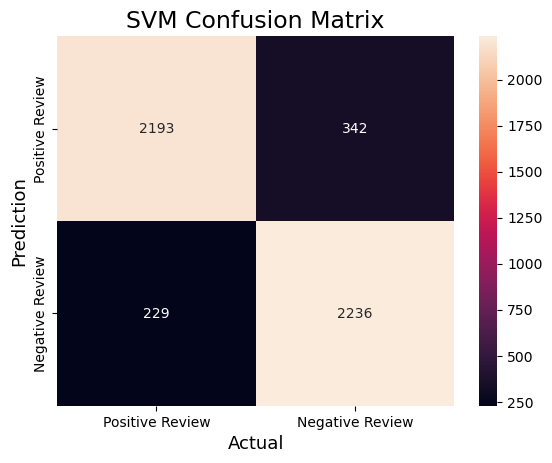

In [36]:
# create confusion matrix for the SVM model
svm_cm = confusion_matrix(y_test,svm_y_pred)

#visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(svm_cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Positive Review','Negative Review'],
            yticklabels=['Positive Review','Negative Review'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('SVM Confusion Matrix',fontsize=17)
plt.show()

In [37]:
# Get the precision, recall, and F1-score for the test set predictions.
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.88      2535
           1       0.87      0.91      0.89      2465

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



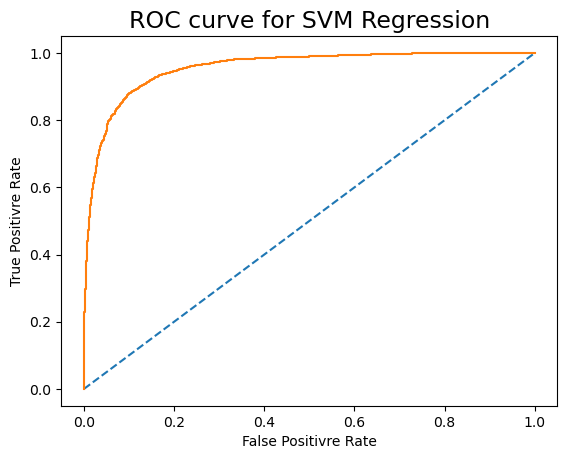

In [39]:
# Create a ROC curve for the test set.
svm_y_pred_prob = model.predict_proba(xv_test)[:,1]

svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_y_pred_prob)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel('False Positivre Rate')
plt.ylabel('True Positivre Rate')
plt.title('ROC curve for SVM Regression',fontsize=17)
plt.show()